## Import Dataset

In [1]:
import pandas as pd
df = pd.read_csv('Datasets/label.csv')

In [2]:
df

,Left_Shoulder_Angle,Right_Shoulder_Angle,Left_Elbow_Angle,Right_Elbow_Angle,Left_Wrist_Angle,Right_Wrist_Angle,Left_Hip_Angle,Right_Hip_Angle,Left_Knee_Angle,Right_Knee_Angle,Neck_Angle,Left_Ankle_Angle,Right_Ankle_Angle,Left_Heel_Angle,Right_Heel_Angle,Left_Foot_Index_Angle,Right_Foot_Index_Angle,Label
0,86.215136,96.490932,198.692157,186.091832,10.210737,3.315068,133.286725,130.429435,184.356133,181.767693,354.728850,197.475962,203.044959,79.361934,72.109095,340.292859,342.557181,1
1,87.010298,96.624839,200.655449,186.134169,12.203825,3.355118,133.496719,130.777858,184.318746,182.283359,354.729817,197.661706,206.054118,78.979553,69.503229,340.397911,343.461994,1
2,86.958240,96.015099,201.385496,186.227131,12.883959,3.386578,134.103589,132.126697,184.594975,182.072481,353.971730,195.751703,205.876464,80.095765,69.439206,340.073186,343.488163,1
3,86.595920,95.516188,201.369600,186.259388,12.840367,3.388298,134.839179,132.897721,184.499333,182.078956,353.741403,194.476037,204.745470,80.252387,69.567328,339.522735,343.206971,1
4,86.147578,94.918789,201.258657,186.318449,12.699514,3.411023,135.907408,133.755566,184.051568,182.235395,353.839265,193.069077,198.019369,79.819797,72.729458,338.671942,341.395428,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10923,30.946684,35.856246,202.608911,191.692847,11.006249,5.524475,207.443456,223.940365,201.637929,185.960379,340.264386,210.925751,204.763355,36.485412,39.215254,346.205428,346.625005,0
10924,31.136693,35.971856,202.203579,191.450013,10.836240,5.447427,207.915805,224.407377,200.764446,185.693833,339.288579,211.474718,204.714191,36.431977,39.124904,346.073909,346.581279,0
10925,31.159160,36.047436,202.155183,191.215045,10.810095,5.374923,207.911335,224.648669,200.744424,185.646097,339.095764,211.303560,204.534759,36.688484,39.181080,345.863098,346.530730,0
10926,31.104958,36.062517,202.325817,191.213918,10.932673,5.394223,207.954862,224.636295,200.599043,185.626732,338.969730,211.623677,204.460593,36.689446,39.338625,345.786770,346.494257,0


# remove outliers

In [3]:
# Calculate (Q1) and (Q3)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the IQR (interquartile range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Remove outliers
df = df[~outliers]

# train test split

In [4]:
from sklearn.model_selection import train_test_split
# Separate features (X) and labels (y)
X = df.drop(['Label'], axis=1)
y = df['Label']

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4547, 17)
X_test shape: (1137, 17)
y_train shape: (4547,)
y_test shape: (1137,)


# Train model KNN

Accuracy: 98.94%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       513
           1       0.99      0.99      0.99       624

    accuracy                           0.99      1137
   macro avg       0.99      0.99      0.99      1137
weighted avg       0.99      0.99      0.99      1137


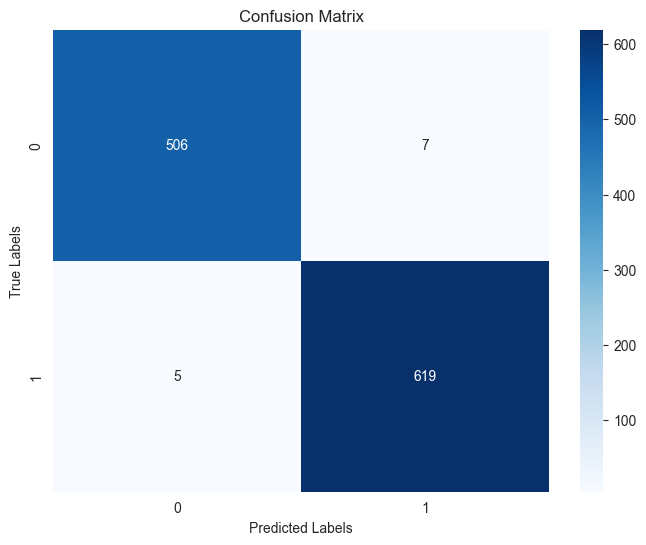

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the KNN classifier
k = 3  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Train Test NN 

Epoch 1/100
107/107 - 4s - loss: 3.2416 - accuracy: 0.5416 - val_loss: 0.7729 - val_accuracy: 0.7018 - 4s/epoch - 36ms/step
Epoch 2/100
107/107 - 0s - loss: 0.7515 - accuracy: 0.6642 - val_loss: 0.6919 - val_accuracy: 0.7150 - 463ms/epoch - 4ms/step
Epoch 3/100
107/107 - 0s - loss: 0.6896 - accuracy: 0.6733 - val_loss: 0.6414 - val_accuracy: 0.7027 - 492ms/epoch - 5ms/step
Epoch 4/100
107/107 - 0s - loss: 0.6428 - accuracy: 0.6938 - val_loss: 0.6022 - val_accuracy: 0.7282 - 460ms/epoch - 4ms/step
Epoch 5/100
107/107 - 0s - loss: 0.6061 - accuracy: 0.7100 - val_loss: 0.5658 - val_accuracy: 0.7318 - 456ms/epoch - 4ms/step
Epoch 6/100
107/107 - 0s - loss: 0.5812 - accuracy: 0.7276 - val_loss: 0.5434 - val_accuracy: 0.7687 - 467ms/epoch - 4ms/step
Epoch 7/100
107/107 - 0s - loss: 0.5544 - accuracy: 0.7460 - val_loss: 0.5226 - val_accuracy: 0.7625 - 460ms/epoch - 4ms/step
Epoch 8/100
107/107 - 0s - loss: 0.5420 - accuracy: 0.7545 - val_loss: 0.5543 - val_accuracy: 0.7467 - 464ms/epoch - 4ms

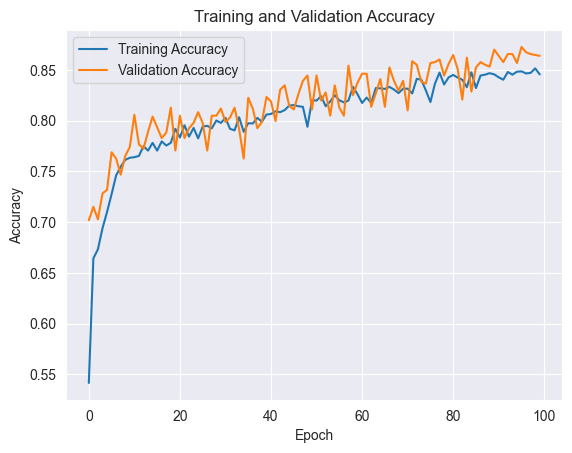

36/36 [==============================] - 0s 4ms/step - loss: 0.3585 - accuracy: 0.8654
Test Loss: 0.3585245609283447
Test Accuracy: 0.8654353618621826
36/36 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       500
           1       0.89      0.86      0.88       637

    accuracy                           0.87      1137
   macro avg       0.86      0.87      0.86      1137
weighted avg       0.87      0.87      0.87      1137


In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

nn_X_train, nn_X_temp, nn_y_train, nn_y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
nn_X_val, nn_X_test, nn_y_val, nn_y_test = train_test_split(nn_X_temp, nn_y_temp, test_size=0.5, random_state=42)

# Define the model
nn_model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
nn_model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(nn_X_train, nn_y_train, epochs=100, batch_size=32, validation_data=(nn_X_val, nn_y_val),verbose=2)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = nn_model.evaluate(nn_X_test, nn_y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Make predictions on test data
nn_y_pred = (nn_model.predict(nn_X_test) > 0.5).astype("int32")

# Print classification report
print("Classification Report:")
print(classification_report(nn_y_test, nn_y_pred))

## NN grid search

In [7]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# 
# nn_X_train, nn_X_temp, nn_y_train, nn_y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# nn_X_val, nn_X_test, nn_y_val, nn_y_test = train_test_split(nn_X_temp, nn_y_temp, test_size=0.5, random_state=42)
# 
# # function to create and train the model with specified parameters
# def train_model(epochs, batch_size, learning_rate, num_layers, num_nodes):
#     # Define the model architecture based on specified number of layers and nodes
#     nn_model = keras.Sequential()
#     nn_model.add(layers.Dense(num_nodes, activation='relu', input_shape=(nn_X_train.shape[1],)))
# 
#     for _ in range(num_layers - 1):
#         nn_model.add(layers.Dense(num_nodes, activation='relu'))
# 
#     nn_model.add(layers.Dense(1, activation='sigmoid'))
# 
#     optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#     nn_model.compile(optimizer=optimizer,
#                      loss='binary_crossentropy',
#                      metrics=['accuracy'])
# 
#     # Train the model
#     history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(nn_X_val, nn_y_val), verbose=0)
# 
#     # Evaluate the model on test data
#     test_loss, test_accuracy = nn_model.evaluate(nn_X_test, nn_y_test, verbose=0)
# 
#     return test_accuracy, history.history['accuracy'], history.history['val_accuracy']
# 
# # Define parameters for hyperparameter tuning
# epochs_list = [10, 25, 50, 75, 100, 125]
# batch_sizes = [32, 64, 128]
# learning_rates = [0.0001,0.001,0.01]
# num_layers_list = [2, 3, 4] 
# num_nodes_list = [16, 32, 64, 128] 
# 
# # Iterate through different configurations
# for epochs in epochs_list:
#     for batch_size in batch_sizes:
#         for learning_rate in learning_rates:
#             for num_layers in num_layers_list:
#                 for num_nodes in num_nodes_list:
#                     # Train the model with current configuration
#                     test_accuracy, train_acc_history, val_acc_history = train_model(epochs, batch_size, learning_rate, num_layers, num_nodes)
# 
#                     # Print parameters and performance metrics
#                     print(f"Epochs: {epochs}, Batch Size: {batch_size}, Learning Rate: {learning_rate}")
#                     print(f"Num Layers: {num_layers}, Num Nodes per Layer: {num_nodes}")
#                     print(f"Test Accuracy: {test_accuracy:.4f}")
#                     print(f"Final Training Accuracy: {train_acc_history[-1]:.4f}")
#                     print(f"Final Validation Accuracy: {val_acc_history[-1]:.4f}")
#                     print("")
# 
#                     # Plot training history
#                     plt.figure(figsize=(8, 6))
#                     plt.plot(range(1, epochs + 1), train_acc_history, label='Training Accuracy', marker='o')
#                     plt.plot(range(1, epochs + 1), val_acc_history, label='Validation Accuracy', marker='o')
#                     plt.xlabel('Epoch')
#                     plt.ylabel('Accuracy')
#                     plt.title(f'Training and Validation Accuracy (Epochs: {epochs}, Batch Size: {batch_size}, LR: {learning_rate}, Layers: {num_layers}, Nodes: {num_nodes})')
#                     plt.legend()
#                     plt.grid(True)
#                     plt.show()


# Train Test SVM model

SVM Model Accuracy Score: 0.8434
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       513
           1       0.78      1.00      0.88       624

    accuracy                           0.84      1137
   macro avg       0.89      0.83      0.83      1137
weighted avg       0.88      0.84      0.84      1137


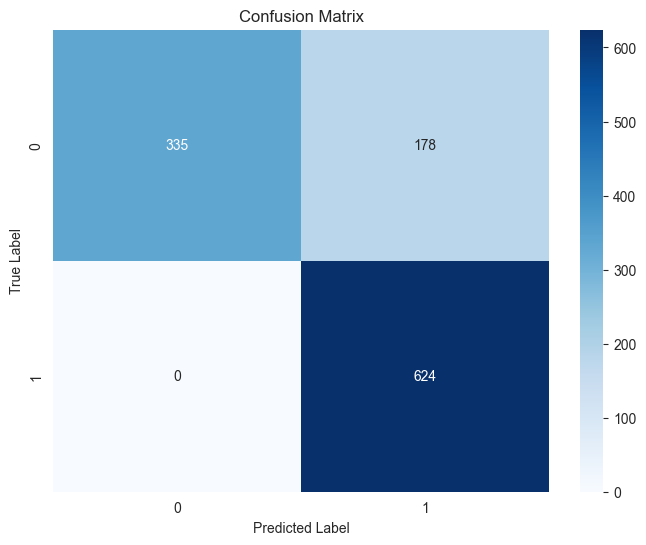

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Standardize features by removing the mean and scaling to unit variance
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize the Multi-Class SVM classifier
svm_model = SVC(C= 10, degree= 2, gamma= 0.1, kernel='rbf')

# Train the classifier
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print(f"SVM Model Accuracy Score: {accuracy:.4f}")

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(class_report)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## svm grid search

In [9]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# 
# # Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': [0.1, 1, 10],
#     'degree': [2, 3, 4]
# }
# 
# # Create the GridSearchCV object
# grid_search = GridSearchCV(SVC(), param_grid, cv=5)
# 
# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)
# 
# # Get the best parameters
# print("Best parameters:", grid_search.best_params_)
# 
# # Use the best model for prediction
# best_svc = grid_search.best_estimator_
# y_pred = best_svc.predict(X_test)

# Train Test Kmeans model

Average Silhouette Score: 0.80


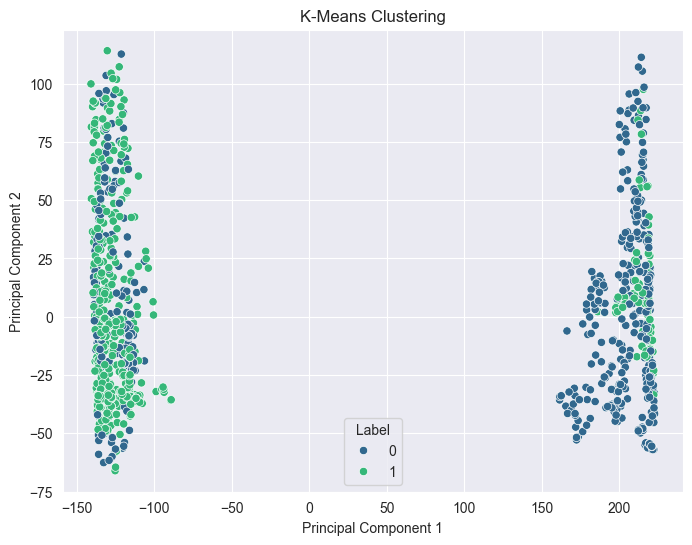

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Specify the number of clusters 
k_clusters = 2

# Initialize and fit the K-Means model
kmeans_model = KMeans(n_clusters=k_clusters, random_state=40)
kmeans_model.fit(X_train) 

# Predict clusters for the test set
cluster_labels = kmeans_model.predict(X_test) 

# Evaluate the model 
silhouette_avg = silhouette_score(X_test, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg:.2f}")

# Plotting clusters
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_test, palette='viridis', legend='full')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Train Test random forest model

Accuracy Score: 0.9938
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       513
           1       0.99      1.00      0.99       624

    accuracy                           0.99      1137
   macro avg       0.99      0.99      0.99      1137
weighted avg       0.99      0.99      0.99      1137


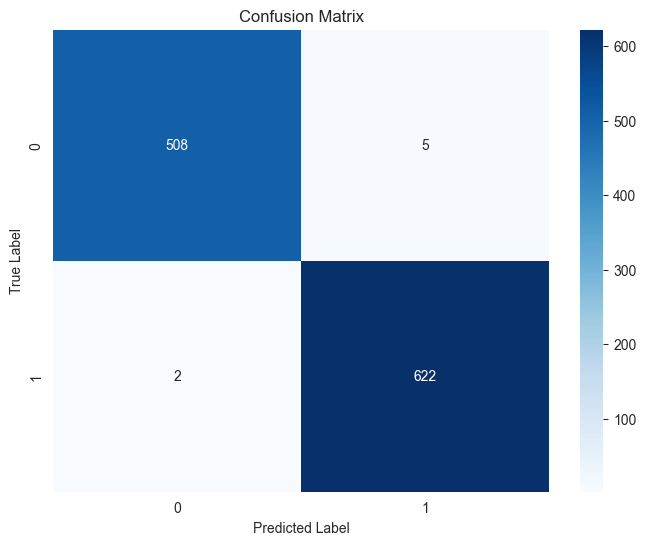

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the classifier
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print(f"Accuracy Score: {accuracy:.4f}")

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(class_report)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Save Model

In [12]:
import pickle

# Save the trained model
model_filename = 'Model/model.pkl'

with open(model_filename, 'wb') as model_file:
    pickle.dump(svm_model, model_file)

print(f"Model saved as {model_filename}")

Model saved as Model/model.pkl
